In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/MyDrive/Interview/Dotech")

In [ ]:
!ls

model_src	      saving_data					    sign_data
model_src_2	      siamese-signature-verification-with-confidence.ipynb  Untitled0.ipynb
model_src_full_new_2  signature-verification-dataset.zip


In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("robinreni/signature-verification-dataset")

# print("Path to dataset files:", path)

In [ ]:
# !kaggle datasets download robinreni/signature-verification-dataset -p .

In [ ]:
!ls

model_src					      test_images1.pkl	 train_images2.npy
model_src_2					      test_images2.pkl	 train_images2.pkl
siamese-signature-verification-with-confidence.ipynb  test_labels.pkl	 train_labels.npy
signature-verification-dataset.zip		      train_images1.npy  train_labels.pkl
sign_data					      train_images1.pkl  Untitled0.ipynb


In [ ]:
# !unzip signature-verification-dataset.zip

In [ ]:
train_dir='/content/drive/MyDrive/interview/Dotech/sign_data/sign_data/train/'
test_dir='/content/drive/MyDrive/interview/Dotech/sign_data/sign_data/test/'

In [ ]:
import pandas as pd

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/interview/Dotech/sign_data/sign_data/train_data.csv')
df_train.head(10)

,068/09_068.png,068_forg/03_0113068.PNG,1
0,068/09_068.png,068_forg/01_0124068.PNG,1
1,068/09_068.png,068_forg/02_0124068.PNG,1
2,068/09_068.png,068_forg/01_0113068.PNG,1
3,068/09_068.png,068_forg/04_0124068.PNG,1
4,068/09_068.png,068_forg/04_0113068.PNG,1
5,068/09_068.png,068_forg/02_0113068.PNG,1
6,068/09_068.png,068_forg/03_0124068.PNG,1
7,068/02_068.png,068_forg/03_0113068.PNG,1
8,068/02_068.png,068_forg/01_0124068.PNG,1
9,068/02_068.png,068_forg/02_0124068.PNG,1


In [ ]:
df_train.shape

(23205, 3)

In [ ]:
df_train['1'].unique()

array([1, 0])

(126, 497, 3)


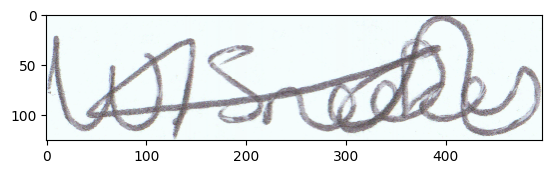

In [ ]:
import matplotlib.pyplot as plt
img=plt.imread(train_dir+df_train.iat[1,0])
print(img.shape)
plt.imshow(img)

In [3]:
import joblib
import numpy as np
train_images1 = joblib.load("train_images_reduce_128_1.pkl")
train_images2 = joblib.load("train_images_reduce_128_2.pkl")
train_labels = joblib.load("train_labels_reduce_128.pkl")

In [ ]:
import cv2
train_images1=[]
train_images2=[]
train_labels=[]
for i in range(len(df_train)):
    img1=cv2.imread(train_dir+df_train.iat[i,0])
    img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img1=cv2.resize(img1,(128,128))
    train_images1.append(img1)

    img2=cv2.imread(train_dir+df_train.iat[i,1])
    img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    img2=cv2.resize(img2,(128,128))
    train_images2.append(img2)

    train_labels.append(df_train.iat[i,2])

In [ ]:
train_images1[0].shape

(128, 128)

In [ ]:
import numpy as np

In [ ]:
def preprocess_images(images, batch_size=1000):
    for i in range(0, len(images), batch_size):
        batch = images[i:i+batch_size]
        batch = batch.astype('float32') / 255.0
        batch = np.expand_dims(batch, -1)
        yield batch

In [ ]:
import numpy as np
train_images1=np.array(train_images1)
train_images2=np.array(train_images2)
train_images1 = np.concatenate(list(preprocess_images(train_images1)))
train_images2 = np.concatenate(list(preprocess_images(train_images2)))

In [ ]:
import joblib

# Save data
joblib.dump(train_images1, "train_images_reduce_128_1.pkl")
joblib.dump(train_images2, "train_images_reduce_128_2.pkl")
joblib.dump(train_labels, "train_labels_reduce_128.pkl")

['train_labels_reduce_128.pkl']

In [5]:
print(train_images1.shape)
print(train_images2.shape)

(23205, 128, 128, 1)
(23205, 128, 128, 1)


In [ ]:
type(train_labels)

list

In [4]:
train_labels=np.array(train_labels)

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
!pwd

/content/drive/MyDrive/interview/Dotech


##Test data

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/interview/Dotech/sign_data/sign_data/test_data.csv')
df_test.head()

,068/09_068.png,068_forg/03_0113068.PNG,1
0,068/09_068.png,068_forg/01_0124068.PNG,1
1,068/09_068.png,068_forg/02_0124068.PNG,1
2,068/09_068.png,068_forg/01_0113068.PNG,1
3,068/09_068.png,068_forg/04_0124068.PNG,1
4,068/09_068.png,068_forg/04_0113068.PNG,1


In [ ]:
df_test.shape

(5747, 3)

In [ ]:
test_images1=joblib.load("test_images1.pkl")
test_images2=joblib.load("test_images2.pkl")

In [ ]:
test_images1=[]
test_images2=[]
for j in range(len(df_test)):
    img1=cv2.imread(test_dir+df_test.iat[j,0])
    img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img1=cv2.resize(img1,(150,220))
    test_images1.append(img1)

    img2=cv2.imread(test_dir+df_test.iat[j,1])
    img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    img2=cv2.resize(img2,(150,220))
    test_images2.append(img2)

In [ ]:
test_images1=np.array(test_images1)/255.0
test_images2=np.array(test_images2)/255.0
test_images1=np.expand_dims(test_images1,-1)
test_images2=np.expand_dims(test_images2,-1)
test_labels=np.array(df_test['1'])

In [ ]:
import joblib

# Save test data
joblib.dump(test_images1, "test_images_new_1.pkl")
joblib.dump(test_images2, "test_images_new_2.pkl")


['test_images_new_2.pkl']

In [ ]:
# import joblib

# # Save test_labels
# joblib.dump(test_labels, "test_labels.pkl")

['test_labels.pkl']

In [ ]:
test_labels=joblib.load("test_labels.pkl")

##Model trainning

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D,Dense,Dropout,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Lambda,BatchNormalization,concatenate
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.models import load_model

In [6]:
from tensorflow.keras.models import load_model

In [7]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Dropout, GlobalAveragePooling2D, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

In [8]:
def build_siamese_model(inputShape,embeddingDim=2048):
    inputs=Input(inputShape)
    x=Conv2D(32,(3,3),padding='same',activation='relu',strides=(1,1))(inputs) #,kernel_regularizer=regularizers.l1(.001)
    # x=Dropout(.25)(x)
    x=BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

    x=Conv2D(64,(3,3),padding='same',activation='relu',strides=(1,1))(x) #,kernel_regularizer=regularizers.l1(.0001)
    x=BatchNormalization(axis=-1)(x)
    # x=Dropout(.25)(x)
    x=MaxPooling2D(pool_size=(2,2),strides=(2,2))(x)

    x=Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu')(x)
    x=Dropout(.25)(x)
    x=BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x=Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu')(x)
    #x=Dropout(.25)(x)
    x=BatchNormalization(axis=-1)(x)
    x=Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu')(x)
    x=BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2,2))(x)
    x=Conv2D(512,(3,3),padding='same',activation='relu')(x)  #,kernel_regularizer=regularizers.l1(.0001)
    x=BatchNormalization(axis=-1)(x)
    x=Conv2D(512,(3,3),padding='same',activation='relu')(x) #,kernel_regularizer=regularizers.l1(.0001)
    x=BatchNormalization(axis=-1)(x)
    #x=Dropout(.25)(x)
    x=MaxPooling2D(pool_size=2)(x)

    x=Conv2D(1024,(5,5),padding='same',activation='relu')(x) #,kernel_regularizer=regularizers.l1(.0001)
    x=BatchNormalization(axis=-1)(x)
    x=Conv2D(1024,(5,5),padding='same',activation='relu')(x) #,kernel_regularizer=regularizers.l1(.0001)
    x=BatchNormalization(axis=-1)(x)


    pooledOutput=GlobalAveragePooling2D()(x)
    #x=Dropout(.20)(x)
    outputs=Dense(embeddingDim,activation='linear')(pooledOutput)
    model=Model(inputs,outputs)
    return model

In [9]:
IMG_SHAPE=(128,128,1)
BATCH_SIZE=32
EPOCHS=150
INIT_LR=.001
opt=SGD(learning_rate=INIT_LR,decay=INIT_LR/EPOCHS,momentum=.9)
opt2=Adam(learning_rate=INIT_LR,decay=INIT_LR/EPOCHS) #

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
# from tensorflow.keras import backend as K
# def euclidean_distance(vectors):
#     (featsA,featsB)=vectors

#     sumSquared=K.sum(K.square(featsA-featsB),axis=1,keepdims=True)
#     return K.sqrt(K.maximum(sumSquared,K.epsilon()))

# def contrastive_loss(y,preds,margin=1):
#     y=tf.cast(y,preds.dtype)

#     squaredPreds=K.square(preds)
#     squaredMargin=K.square(K.maximum(margin-preds,0))
#     loss=K.mean(y*squaredPreds+(1-y) * squaredMargin)

#     return loss
# # Custom loss: Combine contrastive loss and binary cross-entropy
# def combined_loss(y_true, output1,output2):
#     # Contrastive Loss
#     margin = 1.0
#     y_pred = euclidean_distance([output1, output2])
#     contrastive_loss = contrastive_loss(y_true, y_pred, margin)

#     bce_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=logits)
#     bce_loss = tf.reduce_mean(bce_loss)
#     # Binary Cross-Entropy Loss

#     # Combine both losses
#     return contrastive_loss + bce_loss

In [10]:
# Define the Euclidean distance function (used in the loss function)
def euclidean_distance(vectors):
    (featsA, featsB) = vectors

     # Reshape to ensure 2D tensors if necessary
    featsA = tf.reshape(featsA, (tf.shape(featsA)[0], -1))  # Reshape to (batch_size, embedding_dim)
    featsB = tf.reshape(featsB, (tf.shape(featsB)[0], -1))  # Reshape to (batch_size, embedding_dim)

    sumSquared = K.sum(K.square(featsA - featsB), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sumSquared, K.epsilon()))  # To avoid division by zero

# Define the contrastive loss function
def contrastive_loss(y, y_pred,margin):
    # Contrastive Loss
    squared_preds = K.square(y_pred)
    squared_margin = K.square(K.maximum(margin - y_pred, 0))
    loss = K.mean(y * squared_preds + (1 - y) * squared_margin)
    return loss

# Define the combined loss function (contrastive loss + binary cross-entropy)
def combined_loss(y_true, y_pred):
    # Contrastive loss
    margin = 1.0
    contrastive_loss_value = contrastive_loss(y_true,y_pred,margin)

    # Binary Cross-Entropy Loss (for additional training signal)
    bce_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred)  # Can use either featsA or featsB
    bce_loss = tf.reduce_mean(bce_loss)

    # Combine both losses
    return contrastive_loss_value + bce_loss

In [ ]:
# # Define the Euclidean distance function (used in the loss function)
# def euclidean_distance(vectors):
#     (featsA, featsB) = vectors

#      # Reshape to ensure 2D tensors if necessary
#     featsA = tf.reshape(featsA, (tf.shape(featsA)[0], -1))  # Reshape to (batch_size, embedding_dim)
#     featsB = tf.reshape(featsB, (tf.shape(featsB)[0], -1))  # Reshape to (batch_size, embedding_dim)

#     sumSquared = K.sum(K.square(featsA - featsB), axis=1, keepdims=True)
#     return K.sqrt(K.maximum(sumSquared, K.epsilon()))  # To avoid division by zero

# # Define the contrastive loss function
# def contrastive_loss(y, featsA, featsB, margin=1):
#     # Compute the Euclidean distance between the two embeddings
#     y_pred = euclidean_distance([featsA, featsB])

#     # Contrastive Loss
#     squared_preds = K.square(y_pred)
#     squared_margin = K.square(K.maximum(margin - y_pred, 0))
#     loss = K.mean(y * squared_preds + (1 - y) * squared_margin)
#     return loss

# # Define the combined loss function (contrastive loss + binary cross-entropy)
# def combined_loss(y_true, y_pred):
#     featsA, featsB = y_pred[0], y_pred[1]
#     # Contrastive loss
#     margin = 1.0
#     contrastive_loss_value = contrastive_loss(y_true, featsA, featsB, margin)

#     # Calculate the distance
#     distance = euclidean_distance([featsA, featsB])

#     # Apply sigmoid to the distance to get a probability-like value
#     similarity_score = tf.sigmoid(distance)

#     # Binary Cross-Entropy Loss (using the similarity score)
#     bce_loss = tf.keras.losses.binary_crossentropy(y_true, similarity_score)
#     bce_loss = tf.reduce_mean(bce_loss)

#     # Combine both losses
#     return contrastive_loss_value + bce_loss

In [11]:
imgA=Input(shape=IMG_SHAPE)
imgB=Input(shape=IMG_SHAPE)
features=build_siamese_model(IMG_SHAPE)
featsA=features(imgA)
featsB=features(imgB)
distance=Lambda(euclidean_distance)([featsA,featsB])
outputs=Dense(1,activation='linear')(distance)
model=Model(inputs=[imgA,imgB],outputs=distance)
model.compile(loss=combined_loss,optimizer=opt2)

In [ ]:
!pwd

/content/drive/MyDrive/interview/Dotech


In [12]:
import os
os.makedirs("/content/drive/MyDrive/Interview/Dotech/model_src_main_2/", exist_ok=True)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=18,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the model weights from the epoch with the best value
)
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Interview/Dotech/model_src_main_2/model_{val_loss:.5f}.keras",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)


In [16]:
#train_labels=np.array(train_labels)

In [14]:
print(train_images1.shape)
print(train_images2.shape)
print(train_labels.shape)

(23205, 128, 128, 1)
(23205, 128, 128, 1)
(23205,)


In [15]:
history=model.fit([train_images1,train_images2],train_labels,validation_split=.1,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=[checkpoint,early_stopping])

Epoch 1/150
653/653 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 3.2984
Epoch 1: val_loss improved from inf to 1.18721, saving model to /content/drive/MyDrive/Interview/Dotech/model_src_main_2/model_1.18721.keras
653/653 ━━━━━━━━━━━━━━━━━━━━ 120s 145ms/step - loss: 3.2955 - val_loss: 1.1872
Epoch 2/150
653/653 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.9744
Epoch 2: val_loss improved from 1.18721 to 1.11602, saving model to /content/drive/MyDrive/Interview/Dotech/model_src_main_2/model_1.11602.keras
653/653 ━━━━━━━━━━━━━━━━━━━━ 103s 112ms/step - loss: 0.9744 - val_loss: 1.1160
Epoch 3/150
653/653 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.9506
Epoch 3: val_loss did not improve from 1.11602
653/653 ━━━━━━━━━━━━━━━━━━━━ 77s 105ms/step - loss: 0.9506 - val_loss: 1.1241
Epoch 4/150
653/653 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.9488
Epoch 4: val_loss did not improve from 1.11602
653/653 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - loss: 0.9488 - val_loss: 1.1324
Epoch 5/150
653/653 ━━━━━━

In [ ]:
from tensorflow.keras.saving import register_keras_serializable
import tensorflow.keras.backend as K

@register_keras_serializable()
def euclidean_distance(vectors):
    (featsA, featsB) = vectors
    sum_squared = K.sum(K.square(featsA - featsB), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_squared, K.epsilon()))

In [ ]:
model=load_model('/content/drive/MyDrive/interview/Dotech/model_src/model_0.935.keras')

In [ ]:
model.evaluate([test_images1,test_images2],test_labels)

180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9531 - loss: 0.2173


[0.2398827075958252, 0.9425787329673767]

In [ ]:
import numpy as np
import cv2
def preprocess_image_for_prediction(image_path, target_size=(48, 48)):
    """
    Preprocess a single image for prediction: read, convert to grayscale, resize,
    and add batch and channel dimensions.

    Parameters:
    - image_path (str): Path to the image file.
    - target_size (tuple): Desired size of the output image (default is (48, 48)).

    Returns:
    - numpy.ndarray: Preprocessed image ready for model input.
    """
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image at {image_path} could not be read. Check the path.")

    # Convert to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize the image
    img = cv2.resize(img, target_size)

    # Add channel dimension for grayscale (48, 48) -> (48, 48, 1)
    img = np.expand_dims(img, axis=-1)

    # Add batch dimension (48, 48, 1) -> (1, 48, 48, 1)
    img = np.expand_dims(img, axis=0)

    # Convert to float32 and normalize (if needed)
    img = img.astype('float32') / 255.0

    return img


In [ ]:
# Paths to two images
image1_path = "/content/drive/MyDrive/interview/Dotech/sign_data/test/049/01_049.png"
image2_path = "/content/drive/MyDrive/interview/Dotech/sign_data/test/049_forg/04_0210049.PNG"

# Preprocess the images
img1 = preprocess_image_for_prediction(image1_path)
img2 = preprocess_image_for_prediction(image2_path)

# Predict similarity (assuming your Siamese model takes two inputs)
similarity_score = model.predict([img1, img2])

# Output the similarity score
print("Similarity Score:", similarity_score)

# Determine if the signatures match based on a threshold
threshold = 0.5  # Define your threshold
if similarity_score > threshold:
    print("Signatures Match")
else:
    print("Signatures Do Not Match")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Similarity Score: [[0.99999285]]
Signatures Match


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
